In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('bank.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.shape

(4521, 17)

In [6]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [10]:
df['housing'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [11]:
df['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [12]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [13]:
# List of variables to map
binary_columns=['default','housing','loan','y']
# Defining the map function
def mapping(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[binary_columns] = df[binary_columns].apply(mapping)

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [15]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
job_dummies=pd.get_dummies(df['job'],prefix='job')
marital_dummies=pd.get_dummies(df['marital'],prefix='marital')
education_dummies=pd.get_dummies(df['education'],prefix='education')
contact_dummies=pd.get_dummies(df['contact'],prefix='contact')
month_dummies=pd.get_dummies(df['month'],prefix='month')
poutcome_dummies=pd.get_dummies(df['poutcome'],prefix='poutcome')
df=pd.concat([df,job_dummies,marital_dummies,education_dummies,contact_dummies,month_dummies,poutcome_dummies],axis=1)

In [16]:
df.drop(['job','marital','education','contact','month','poutcome'],axis=1,inplace=True)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [17]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,0.016810,1422.657819,0.566025,0.152842,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240,0.105729,0.209246,0.037160,0.024773,0.214333,0.050874,0.040478,0.092236,0.018580,0.169874,0.028312,0.008405,0.116788,0.618668,0.264543,0.149967,0.510064,0.298607,0.041363,0.640566,0.066578,0.292856,0.064809,0.140013,0.004424,0.049104,0.032736,0.156160,0.117452,0.010838,0.309224,0.086043,0.017695,0.011502,0.108383,0.043574,0.028534,0.819509
std,10.576211,0.128575,3009.638142,0.495676,0.359875,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347,0.307524,0.406815,0.189174,0.155451,0.410404,0.219764,0.197099,0.289391,0.135051,0.375564,0.165882,0.091304,0.321203,0.485767,0.441138,0.357078,0.499954,0.457697,0.199149,0.479888,0.249318,0.455123,0.246215,0.347039,0.066372,0.216109,0.177965,0.363047,0.321994,0.103553,0.462225,0.280458,0.131856,0.106640,0.310898,0.204169,0.166510,0.384638
min,19.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,69.000000,0.000000,0.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,444.000000,1.000000,0.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,0.000000,1480.000000,1.000000,0.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,87.000000,1.000000,71188.000000,1.000000,1.000000,31.000000,3025.000000,50.000000,871.

In [18]:
df.shape

(4521, 49)

In [19]:
df['pdays'].value_counts().head()

-1      3705
 182      23
 183      20
 363      12
 92       12
Name: pdays, dtype: int64

In [20]:
df['previous'].value_counts().head()

0    3705
1     286
2     193
3     113
4      78
Name: previous, dtype: int64

In [21]:
df['campaign'].value_counts().head()

1    1734
2    1264
3     558
4     325
5     167
Name: campaign, dtype: int64

In [22]:
df.drop(['pdays','previous','campaign'],axis=1,inplace=True)

In [23]:
df.shape

(4521, 46)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
cols=['age','balance','day','duration','y']

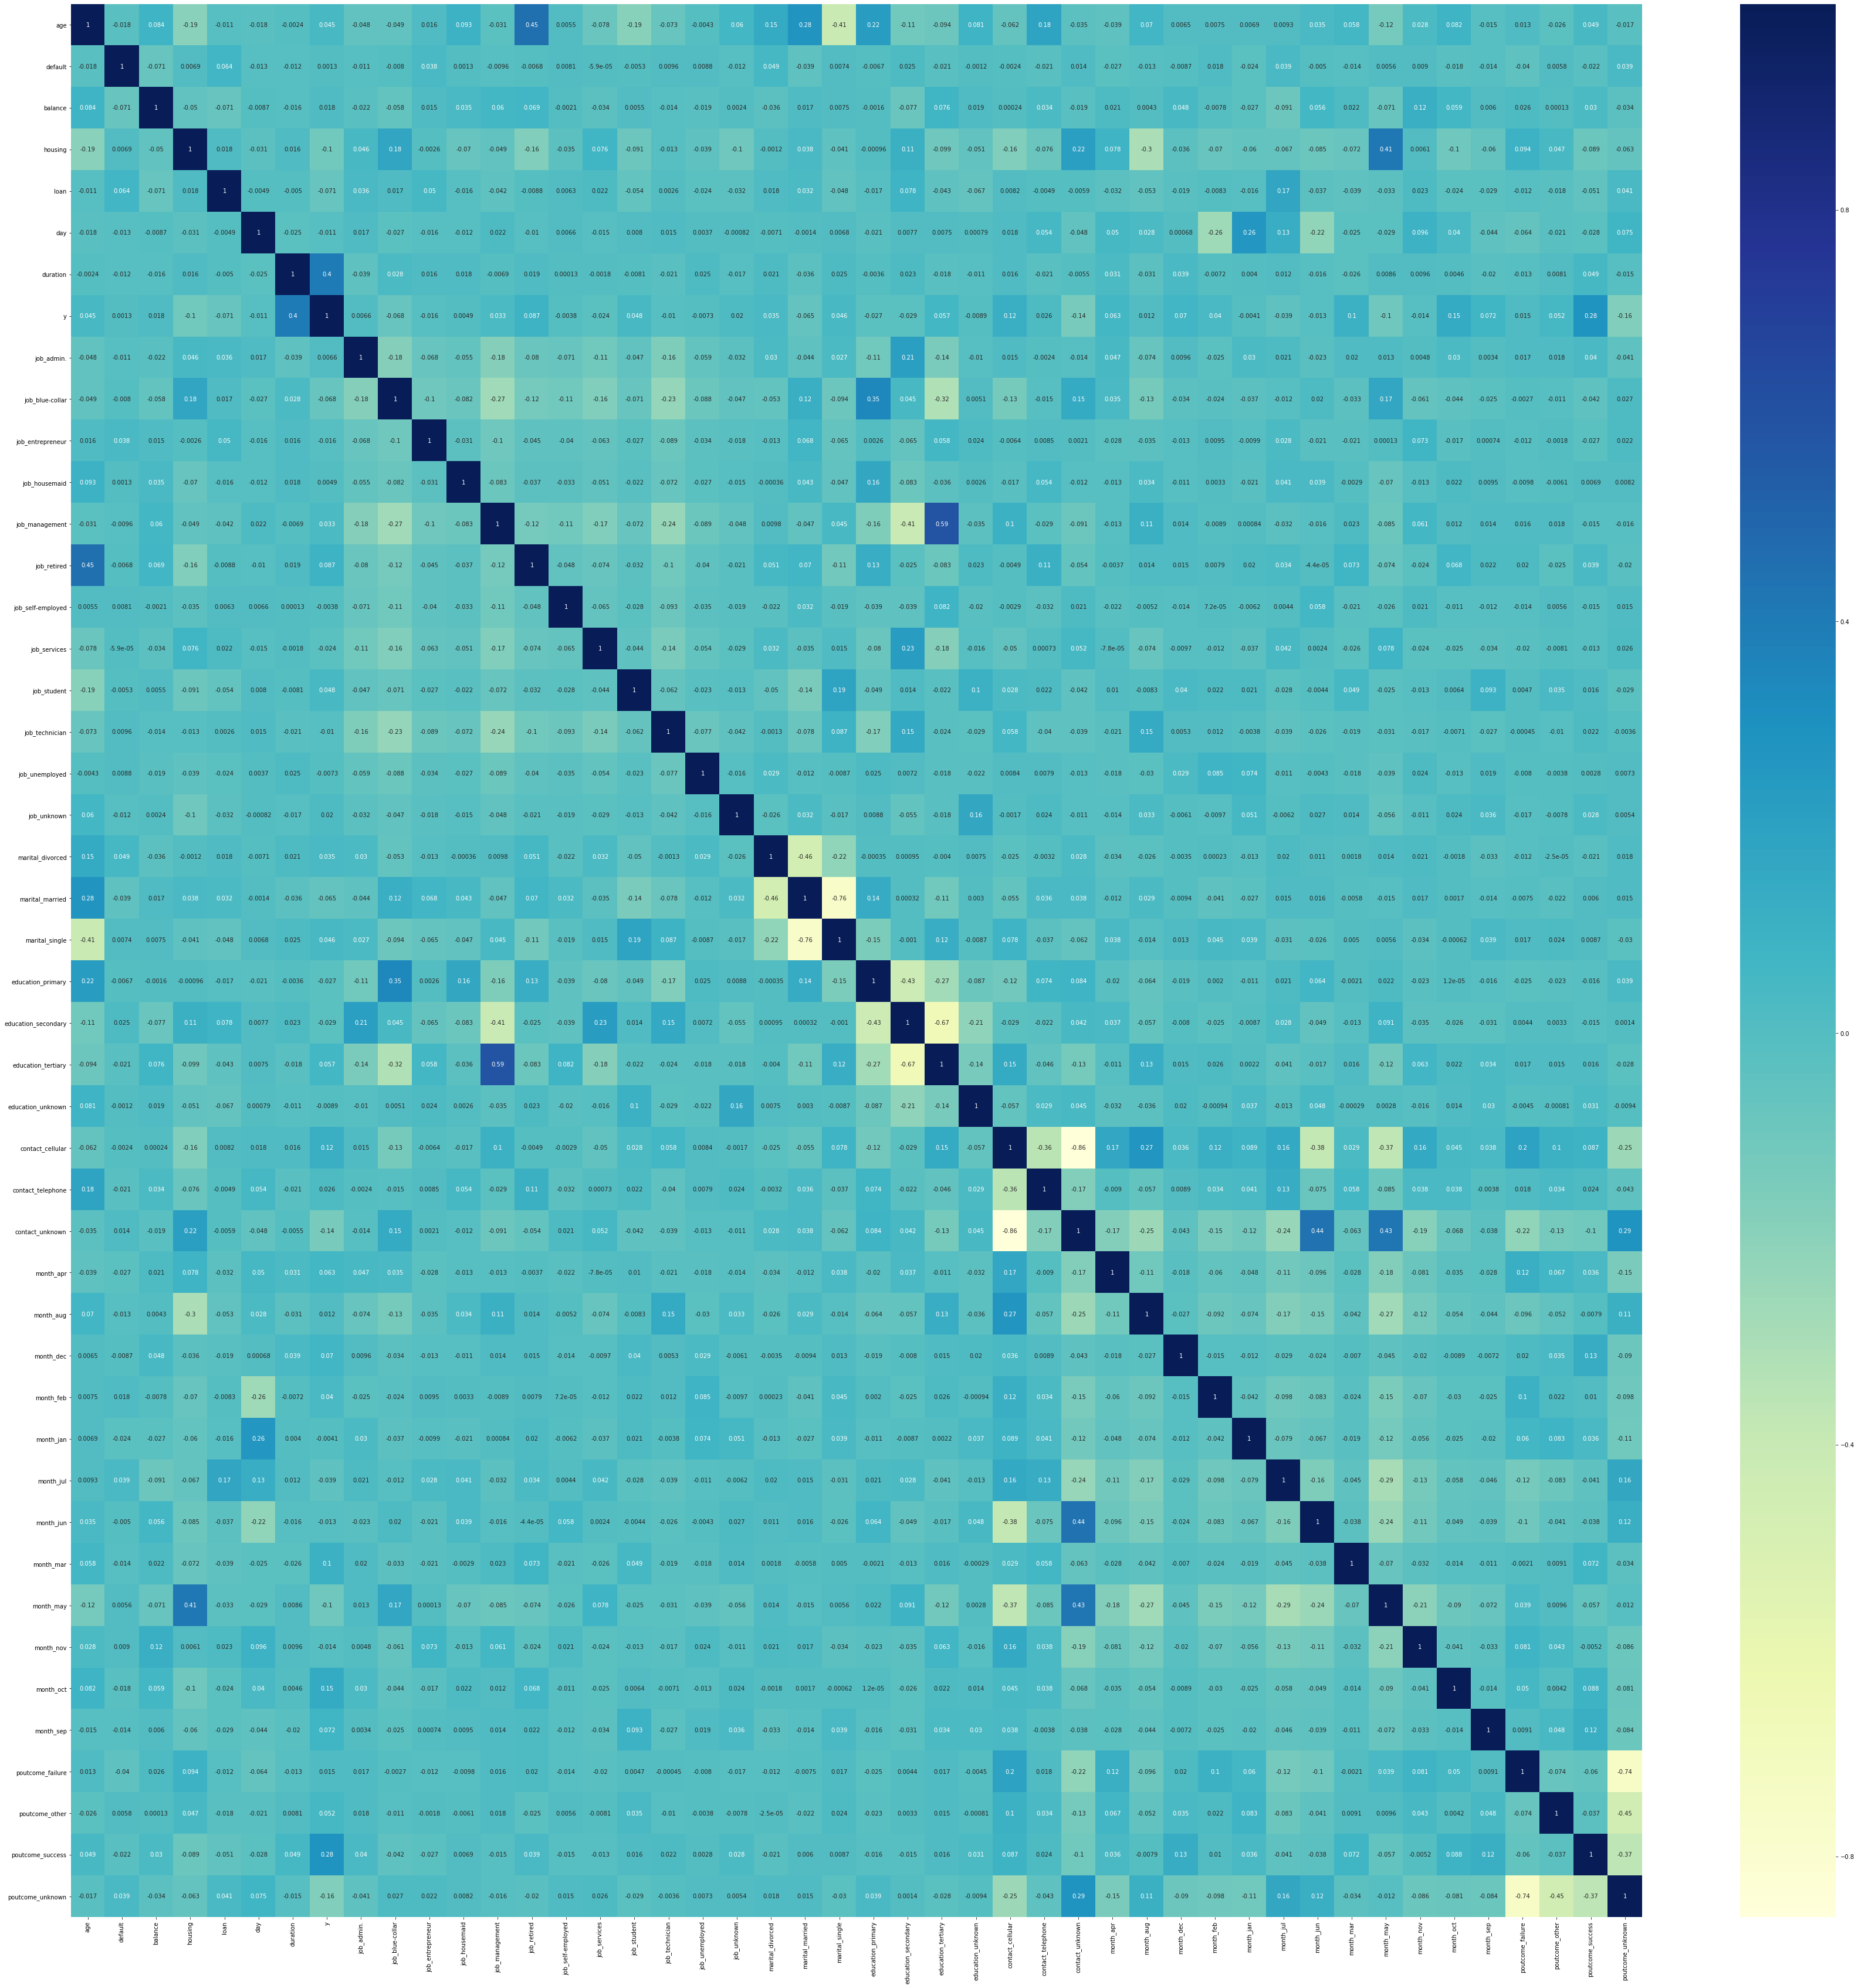

In [26]:
plt.figure(figsize=(60,60))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

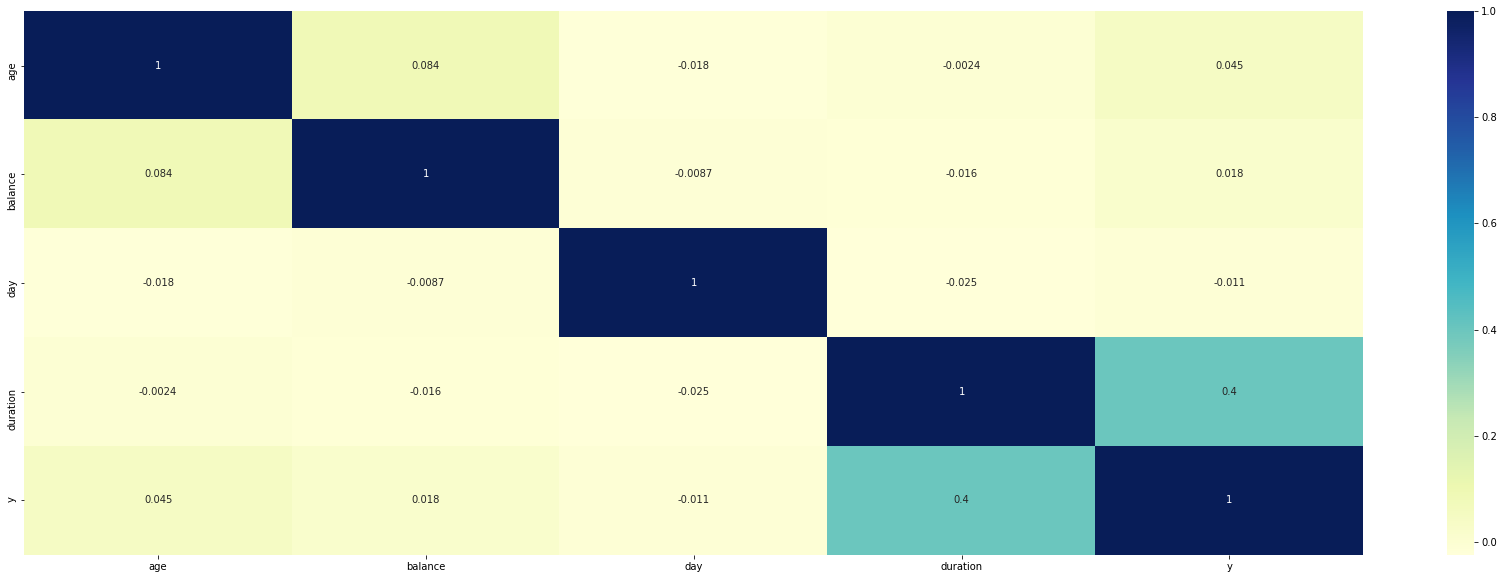

In [27]:
plt.figure(figsize=(30,10))
sns.heatmap(df[cols].corr(), cmap="YlGnBu", annot = True)
plt.show()

Text(0.5, 0, 'Age')

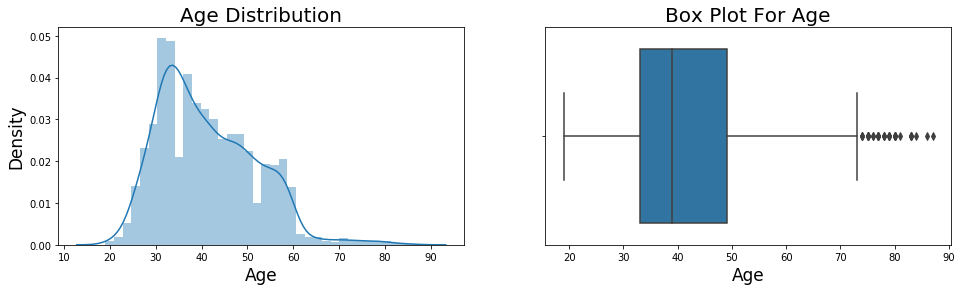

In [28]:
#Plotting the Price Column
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['age'])
plt.title("Age Distribution", fontsize=20)
plt.xlabel("Age", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(df['age'])
plt.title("Box Plot For Age", fontsize=20)
plt.xlabel("Age", fontsize=17)

In [29]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)

## Finding IQR
IQR = Q3 - Q1

## Finding lower boundary for thresholding outlier values
age_lower_boundary = Q1 - 1.5 * IQR
age_upper_boundary = Q3 + 1.5 * IQR
## Printing some outlier values
age_outliers = df.age[(df.age < age_lower_boundary) | (df.age > age_upper_boundary)]

In [30]:
df=df[(df.age > age_lower_boundary) & (df.age < age_upper_boundary)]
df.shape

(4477, 46)

Text(0.5, 0, 'Balance')

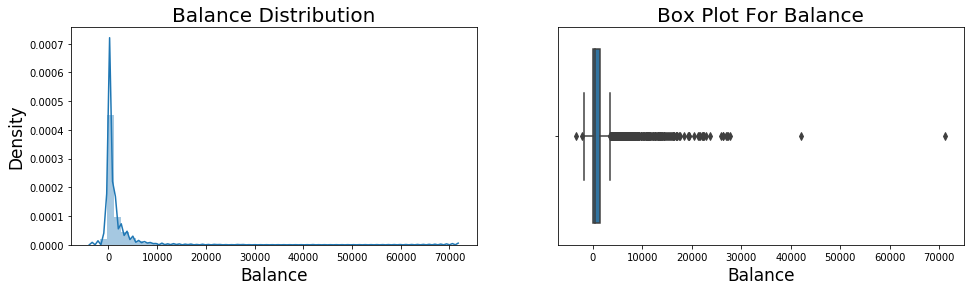

In [31]:
#Plotting the Price Column
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['balance'])
plt.title("Balance Distribution", fontsize=20)
plt.xlabel("Balance", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(df['balance'])
plt.title("Box Plot For Balance", fontsize=20)
plt.xlabel("Balance", fontsize=17)

In [32]:
Q1 = df.balance.quantile(0.25)
Q3 = df.balance.quantile(0.75)

## Finding IQR
IQR = Q3 - Q1

## Finding lower boundary for thresholding outlier values
balance_lower_boundary = Q1 - 1.5 * IQR
balance_upper_boundary = Q3 + 1.5 * IQR
## Printing some outlier values
balance_outliers = df.balance[(df.balance < balance_lower_boundary) | (df.balance > balance_upper_boundary)]
(len(balance_outliers)/len(df)) * 100

11.056511056511056

In [33]:
df=df[(df.balance > balance_lower_boundary) & (df.balance < balance_upper_boundary)]
df.shape

(3982, 46)

Text(0.5, 0, 'Duration')

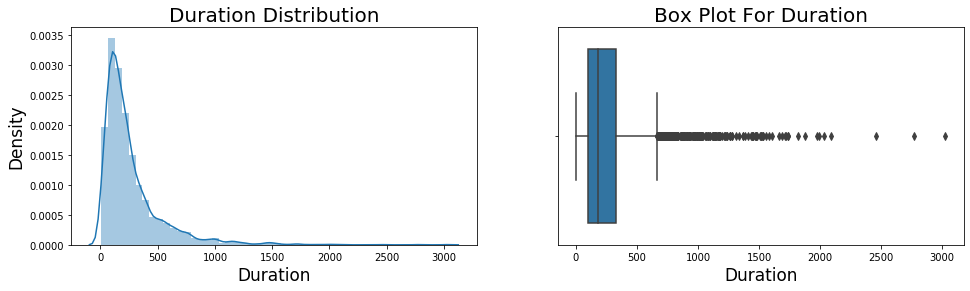

In [34]:
#Plotting the Price Column
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['duration'])
plt.title("Duration Distribution", fontsize=20)
plt.xlabel("Duration", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(df['duration'])
plt.title("Box Plot For Duration", fontsize=20)
plt.xlabel("Duration", fontsize=17)

In [35]:
Q1 = df.duration.quantile(0.25)
Q3 = df.duration.quantile(0.75)

## Finding IQR
IQR = Q3 - Q1

## Finding lower boundary for thresholding outlier values
duration_lower_boundary = Q1 - 1.5 * IQR
duration_upper_boundary = Q3 + 1.5 * IQR
## Printing some outlier values
duration_outliers = df.duration[(df.duration < duration_lower_boundary) | (df.duration > duration_upper_boundary)]
(len(duration_outliers)/len(df)) * 100

7.332998493219487

In [36]:
df=df[(df.duration > duration_lower_boundary) & (df.duration < duration_upper_boundary)]
df.shape

(3690, 46)

In [37]:
df.shape

(3690, 46)

# Let's now make pairwise plot to see for a trend.
sns.pairplot(df)
plt.show()

In [38]:
# Check if there are any duplicate values in the dataset
df[df.duplicated(keep=False)].shape

(0, 46)

In [39]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3,random_state=43)

In [40]:
df_train.describe()

,age,default,balance,housing,loan,day,duration,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000
mean,40.711963,0.020132,638.353852,0.566009,0.162989,15.779714,205.824235,0.081688,0.106852,0.210608,0.033682,0.023616,0.210221,0.041038,0.037940,0.099110,0.018583,0.179249,0.030197,0.008904,0.115757,0.616725,0.267518,0.145954,0.521099,0.295006,0.037940,0.649245,0.060395,0.290360,0.063492,0.145954,0.002323,0.053426,0.034456,0.162602,0.119628,0.007743,0.312427,0.070074,0.015099,0.012776,0.109563,0.039102,0.025552,0.825784
std,9.889273,0.140478,874.108107,0.495720,0.369427,8.308527,145.221808,0.273942,0.308985,0.407819,0.180444,0.151879,0.407544,0.198416,0.191089,0.298867,0.135073,0.383635,0.171163,0.093960,0.319995,0.486279,0.442751,0.353129,0.499651,0.456134,0.191089,0.477299,0.238263,0.454016,0.243893,0.353129,0.048150,0.224925,0.182433,0.369073,0.324589,0.087670,0.463573,0.255320,0.121969,0.112328,0.312404,0.193875,0.157824,0.379369
min,19.000000,0.000000,-1746.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,36.500000,0.000000,0.000000,8.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,322.000000,1.000000,0.000000,16.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,0.000000,942.500000,1.000000,0.000000,21.000000,275.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,72.000000,1.000000,3576.000000,1.000000,1.000000,31.000000,663.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'Binary variables' and 'dummy' variables
num_vars =['symboling','carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

KeyError: "None of [Index(['symboling', 'carheight', 'curbweight', 'boreratio', 'stroke',\n       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price'],\n      dtype='object')] are in the [columns]"

In [ ]:
df_train.describe()

In [ ]:
x_train=df_train.drop(['y'],axis=1)
y_train=df_train['y']

In [ ]:
x_train.shape

In [ ]:
#Plotting the Price Column
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['campaign'])
plt.title("campaign Distribution", fontsize=20)
plt.xlabel("Campaign", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(df['campaign'])
plt.title("Box Plot For Campaign", fontsize=20)
plt.xlabel("Campaign", fontsize=17)


In [ ]:
Q1 = df.campaign.quantile(0.25)
Q3 = df.campaign.quantile(0.75)

## Finding IQR
IQR = Q3 - Q1

## Finding lower boundary for thresholding outlier values
campaign_lower_boundary = Q1 - 1.5 * IQR
campaign_upper_boundary = Q3 + 1.5 * IQR
## Printing some outlier values
campaign_outliers = df.campaign[(df.campaign < campaign_lower_boundary) | (df.campaign > campaign_upper_boundary)]
(len(campaign_outliers)/len(df)) * 100

In [ ]:
df=df[(df.campaign >= campaign_lower_boundary) & (df.campaign <= campaign_upper_boundary)]
df.shape

In [ ]:
#Plotting the Price Column
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['pdays'])
plt.title("Pdays Distribution", fontsize=20)
plt.xlabel("Pdays", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(df['pdays'])
plt.title("Box Plot For Pdays", fontsize=20)
plt.xlabel("Pdays", fontsize=17)


In [ ]:
Q1 = df.pdays.quantile(0.25)
Q3 = df.pdays.quantile(0.75)

## Finding IQR
IQR = Q3 - Q1

## Finding lower boundary for thresholding outlier values
pdays_lower_boundary = Q1 - 1.5 * IQR
pdays_upper_boundary = Q3 + 1.5 * IQR
## Printing some outlier values
pdays_outliers = df.pdays[(df.pdays < pdays_lower_boundary) | (df.pdays > pdays_upper_boundary)]
(len(pdays_outliers)/len(df)) * 100

In [ ]:
df=df[(df.pdays >= pdays_lower_boundary) & (df.pdays <= pdays_upper_boundary)]
df.shape

In [ ]:
#Plotting the Price Column
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['previous'])
plt.title("Previous column Distribution", fontsize=20)
plt.xlabel("Previous", fontsize=17)
plt.ylabel("Density", fontsize=17)
plt.subplot(1,2,2)
sns.boxplot(df['previous'])
plt.title("Box Plot For Previous column", fontsize=20)
plt.xlabel("Previous column", fontsize=17)


In [ ]:
df.shape